In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import dtale
import klib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
train = pd.read_csv(r"I:\Deep Learning data\big_mart_dataset\train.csv")
test = pd.read_csv(r"I:\Deep Learning data\big_mart_dataset\test.csv")

In [4]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [8]:
train.dtypes.sort_values().to_frame('Feature type').groupby(by='Feature type').size().to_frame('index').reset_index()

,Feature type,index
0,int64,1
1,float64,4
2,object,7


In [9]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [10]:
train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [11]:
train.isnull().sum()

Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [12]:
train['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [13]:
train['Outlet_Size'].fillna(train['Outlet_Size'].mode()[0],inplace=True)
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [14]:
train.isnull().sum()

Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [15]:
train.head()

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,9.30,Low Fat,0.016047,Dairy,249.8092,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,5.92,Regular,0.019278,Soft Drinks,48.2692,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,17.50,Low Fat,0.016760,Meat,141.6180,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,1998,Medium,Tier 3,Grocery Store,732.3800
4,8.93,Low Fat,0.000000,Household,53.8614,1987,High,Tier 3,Supermarket Type1,994.7052


In [16]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [17]:
fat_content ={'low fat':'Low Fat',
              'LF':'Low Fat',
              'reg':'Regular'}

In [18]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace(fat_content)

In [19]:
train.Item_Fat_Content.unique()

array(['Low Fat', 'Regular'], dtype=object)

In [20]:
train.Item_Outlet_Sales.value_counts()

958.7520     17
1342.2528    16
703.0848     15
1845.5976    15
1278.3360    14
             ..
4124.6310     1
6622.7126     1
1614.5650     1
5602.7070     1
2778.3834     1
Name: Item_Outlet_Sales, Length: 3493, dtype: int64

C:\Users\User\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

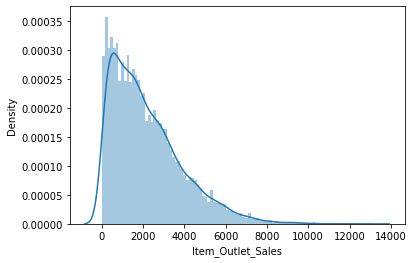

In [21]:
sns.distplot(train.Item_Outlet_Sales, bins=100)

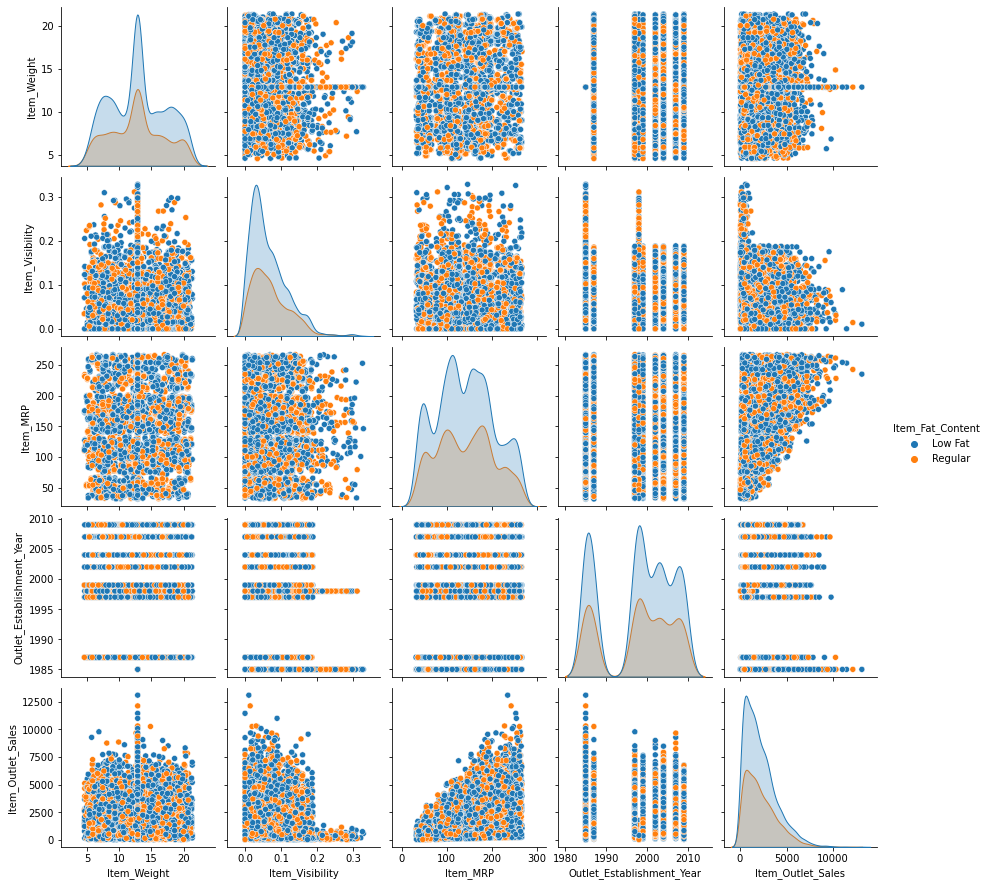

In [22]:
sns.pairplot(train,hue='Item_Fat_Content',)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

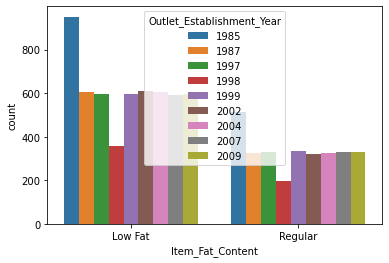

In [23]:
sns.countplot('Item_Fat_Content',data=train,hue='Outlet_Establishment_Year')

In [24]:
train.Item_Type.unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [25]:
train.Outlet_Size.unique()

array(['Medium', 'High', 'Small'], dtype=object)

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



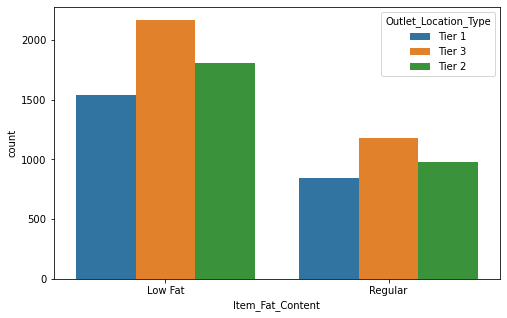

In [26]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Fat_Content',data=train, hue='Outlet_Location_Type')
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



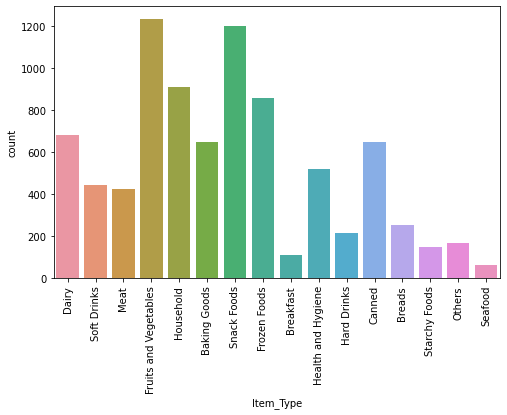

In [27]:
plt.figure(figsize=(8,5))
sns.countplot('Item_Type',data=train)
plt.xticks(rotation =90)
plt.show()

C:\Users\User\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



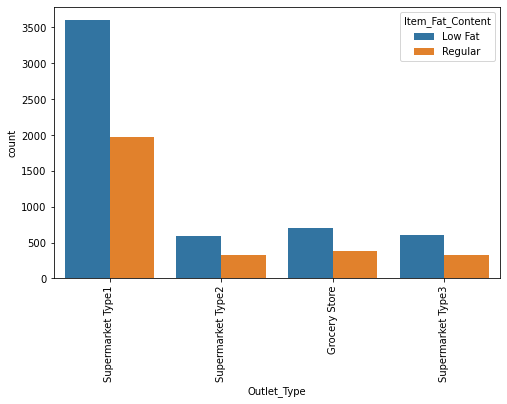

In [28]:
plt.figure(figsize=(8,5))
sns.countplot('Outlet_Type',data=train, hue='Item_Fat_Content')
plt.xticks(rotation=90)
plt.show()

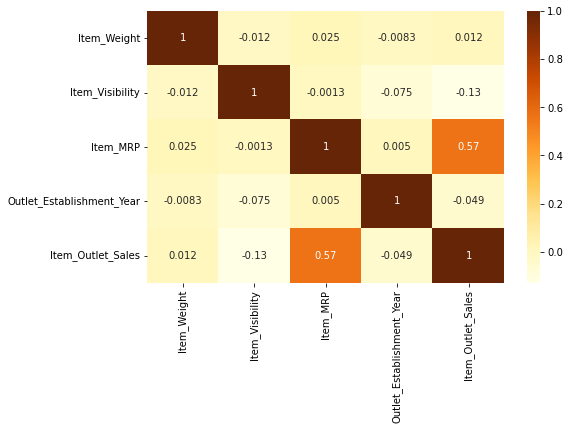

In [29]:
plt.figure(figsize=(8,5))
sns.heatmap(train.corr(),annot=True, cmap='YlOrBr')
plt.show()

<AxesSubplot:title={'center':'Feature-correlation (pearson)'}>

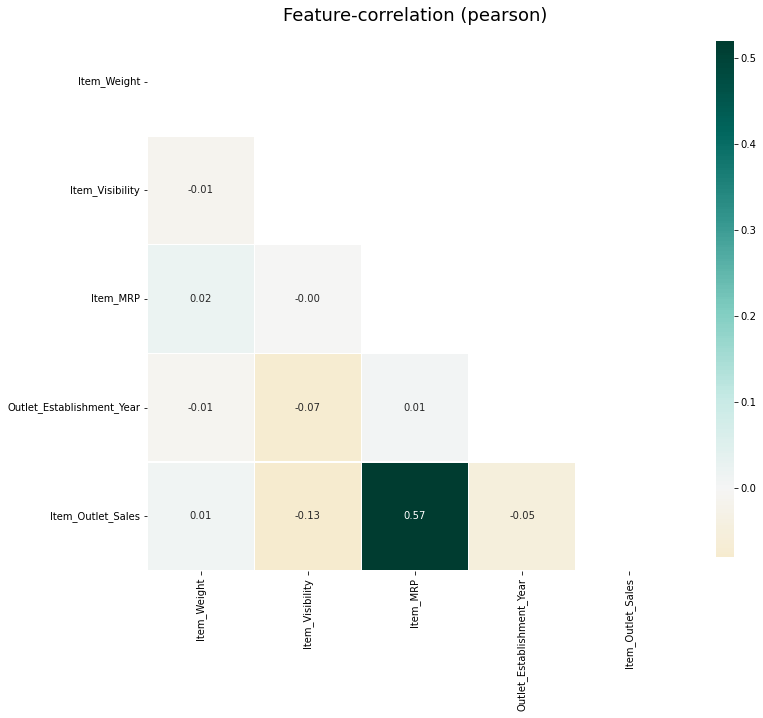

In [30]:
klib.corr_plot(train)

<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

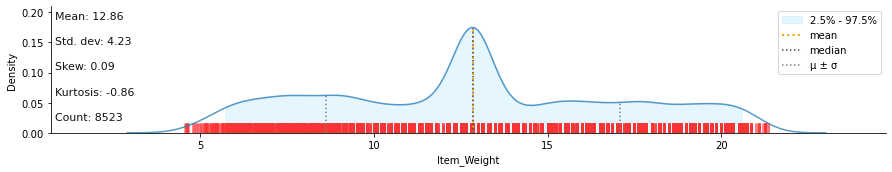

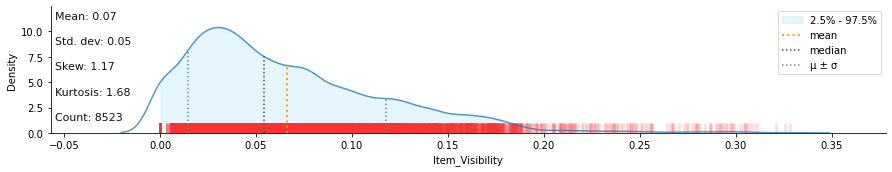

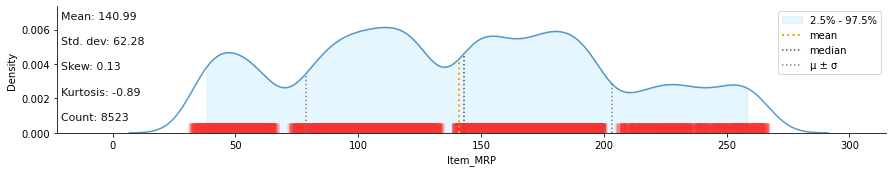

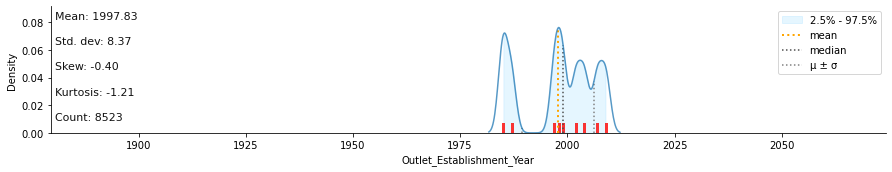

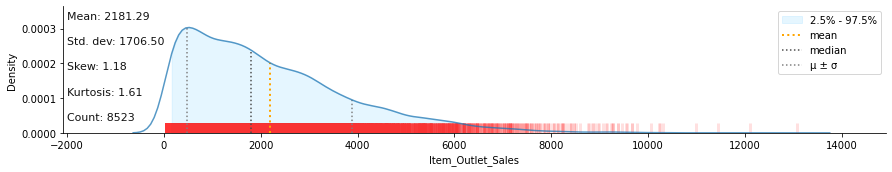

In [31]:
klib.dist_plot(train)

GridSpec(6, 5)

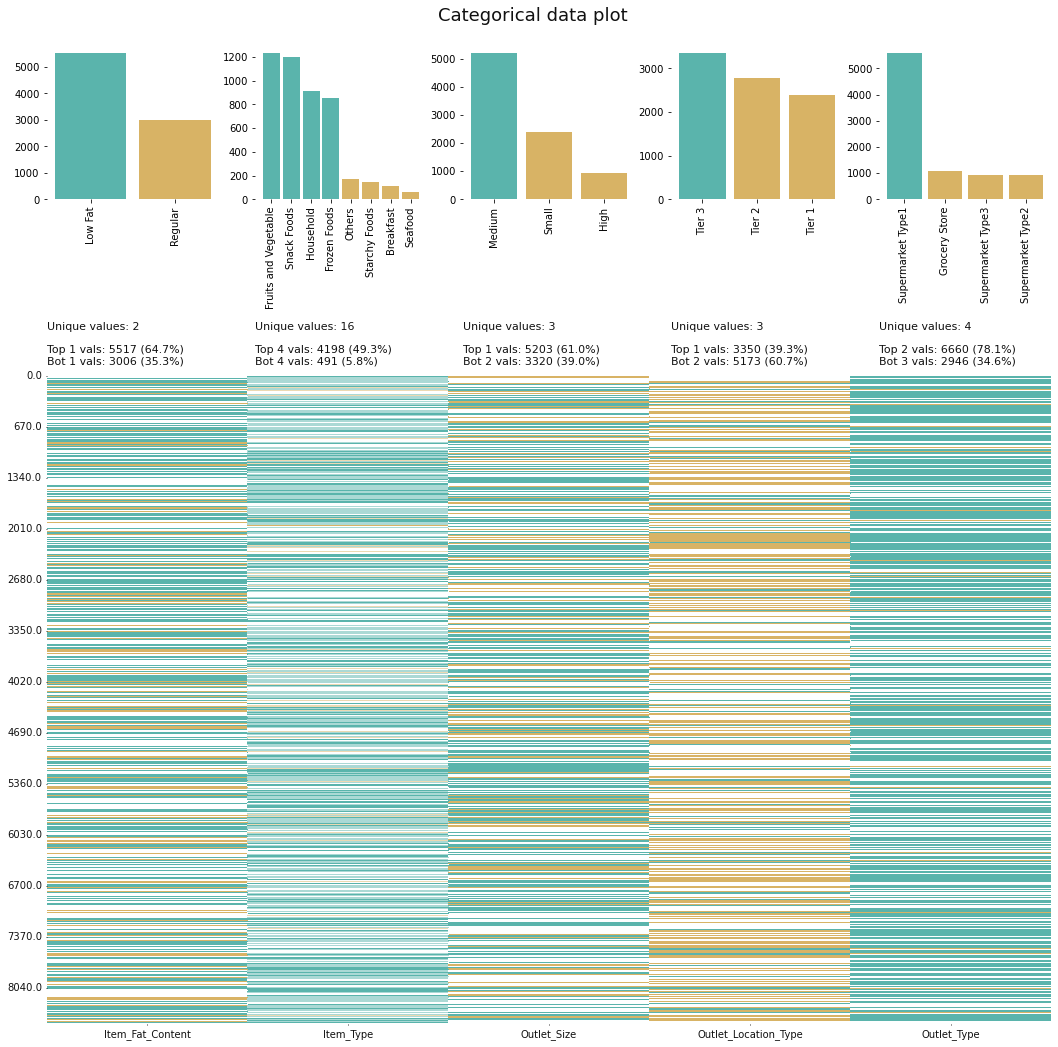

In [32]:
klib.cat_plot(train, top=4, bottom=4) 

In [33]:
dtale.show(train)

In [34]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Weight                8523 non-null   float64
 1   Item_Fat_Content           8523 non-null   object 
 2   Item_Visibility            8523 non-null   float64
 3   Item_Type                  8523 non-null   object 
 4   Item_MRP                   8523 non-null   float64
 5   Outlet_Establishment_Year  8523 non-null   int64  
 6   Outlet_Size                8523 non-null   object 
 7   Outlet_Location_Type       8523 non-null   object 
 8   Outlet_Type                8523 non-null   object 
 9   Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(5)
memory usage: 666.0+ KB


In [35]:
train=klib.convert_datatypes(train)
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   Item_Weight                8523 non-null   Float32 
 1   Item_Fat_Content           8523 non-null   category
 2   Item_Visibility            8523 non-null   Float32 
 3   Item_Type                  8523 non-null   category
 4   Item_MRP                   8523 non-null   Float32 
 5   Outlet_Establishment_Year  8523 non-null   int16   
 6   Outlet_Size                8523 non-null   category
 7   Outlet_Location_Type       8523 non-null   category
 8   Outlet_Type                8523 non-null   category
 9   Item_Outlet_Sales          8523 non-null   Float32 
dtypes: Float32(4), category(5), int16(1)
memory usage: 226.1 KB


In [36]:
from sklearn.preprocessing import LabelEncoder

In [37]:
le = LabelEncoder()

In [38]:
train  = train.apply(le.fit_transform)

In [39]:
train.head()
        

,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,284,0,664,4,5592,4,1,0,1,2540
1,57,1,880,14,473,8,1,2,2,422
2,376,0,715,10,2901,4,1,0,1,1639
3,393,1,0,6,4227,3,1,2,0,670
4,265,0,0,9,627,1,0,2,1,865


In [40]:
X = train.drop('Item_Outlet_Sales',axis = 1)
y = train['Item_Outlet_Sales']

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,r2_score

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [51]:
std = StandardScaler()

In [52]:
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [53]:
lr = LinearRegression()

In [54]:
lr.fit(X_train_std,y_train)

LinearRegression()

In [55]:
y_pred = lr.predict(X_test_std)

In [56]:
print(r2_score(y_test,y_pred))

0.5537973217234535


In [57]:
poly_reg = PolynomialFeatures(degree=2)

In [58]:
poly_reg.fit(X_train)
X_train_poly = poly_reg.transform(X_train)
X_test_poly = poly_reg.transform(X_test)

In [59]:
lr = LinearRegression()

In [72]:
model = lr.fit(X_train_poly,y_train)

In [61]:
lr.score(X_test_poly,y_test)

0.6561355841241538

In [62]:
lr.predict([X_test_poly[0,:]])

array([1075.45222023])

In [63]:
y_predict = lr.predict(X_test_poly)
y_predict

array([1075.45222023,  794.21218428,  510.60243317, ..., 2178.66216721,
       1482.30592011, 1823.1896465 ])

In [64]:
y_test

7503    1398
2957     343
7031     363
1084    3199
856     1796
        ... 
4753    2565
4836    1835
8064    3082
4418    1905
1784    2701
Name: Item_Outlet_Sales, Length: 2131, dtype: int32

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf= RandomForestRegressor(n_estimators=1000)

In [66]:
rf.fit(X_train_std,y_train)

RandomForestRegressor(n_estimators=1000)

In [67]:
y_pred = rf.predict(X_test_std)

In [68]:
print(r2_score(y_test,y_pred))

0.6263421473168573


In [71]:
import joblib

In [74]:
joblib.dump(model,r'I:\Deep Learning data\big_mart_dataset\models\polynomial_regression.save')

['I:\\Deep Learning data\\big_mart_dataset\\models\\polynomial_regression.save']

In [ ]:
model = joblib.load('')